# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Mouse_complete = pd.merge(study_results,mouse_metadata, how= "left",
                         on= "Mouse ID")
# Display the data table for preview
Mouse_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(Mouse_complete["Mouse ID"].unique())
mouse_count

249

In [3]:
#dup_mouse = len(Mouse_complete[['Mouse ID']].duplicated().unique())
dup_mouse = Mouse_complete[Mouse_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_dup_mouse = dup_mouse['Mouse ID'].unique()
unique_dup_mouse

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = Mouse_complete[Mouse_complete.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
Clean_mouse = Mouse_complete[~Mouse_complete['Mouse ID'].isin(unique_dup_mouse)]
Clean_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_mouse = Mouse_complete[~Mouse_complete['Mouse ID'].isin(unique_dup_mouse)]
Clean_mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
Clean_mouse_count = len(Clean_mouse["Mouse ID"].unique())
Clean_mouse_count

248

## Summary Statistics

In [11]:
# Tumor Calculation Objects
Mean_tumor_vol = Clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Median_tumonr_vol = Clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Var_tumor_vol = Clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Std_Dev_tumor_vol = Clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM_tumor_vol = Clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Tumor_stats_df = pd.DataFrame({"Mean Tumor Volume": Mean_tumor_vol, 
                             "Median Tumor Volume":Median_tumonr_vol,
                             "Tumor Volume Variance":Var_tumor_vol,
                             "Tumor Volume Std. Dev.":Std_Dev_tumor_vol,
                             "Tumor Volume Std. Err.":SEM_tumor_vol})
Tumor_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
summary_stats = Clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Agg_summary_stats = Clean_mouse.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
Agg_summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

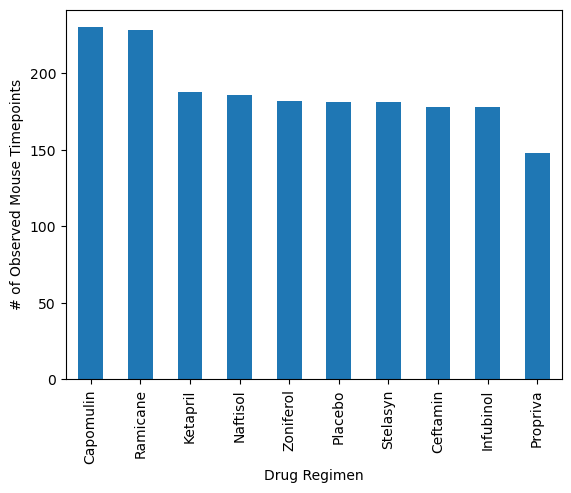

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#regimen_counts = Clean_mouse.groupby('Drug Regimen')["Mouse ID"].size()
regimen_counts = Clean_mouse.groupby('Drug Regimen').size().sort_values(ascending = False)

regimen_counts.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()



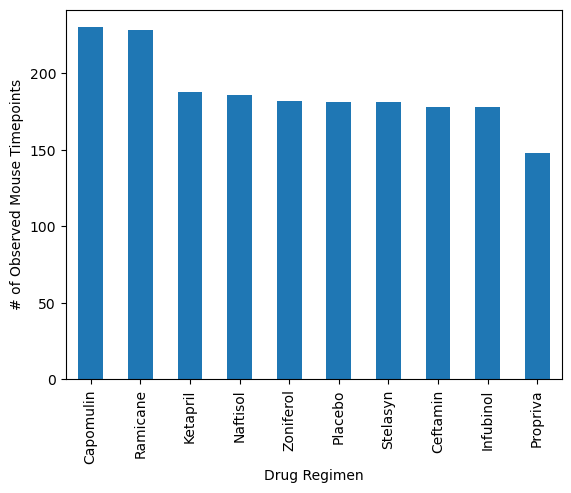

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

regimen_counts = Clean_mouse.groupby('Drug Regimen').size().sort_values(ascending=False)


regimen_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()


<Axes: title={'center': 'Distribution of Female vs Male Mice'}, ylabel='count'>

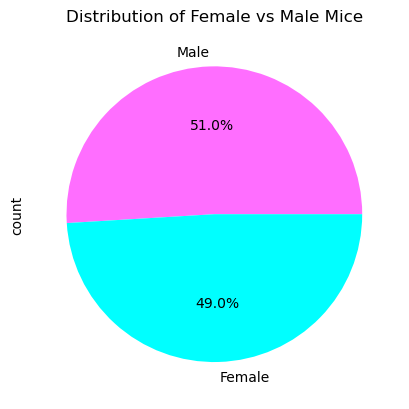

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = Clean_mouse['Sex'].value_counts()
neon_colors = ['#FF6EFF', '#00FFFF']
sex_distribution.plot(kind='pie', autopct='%1.1f%%', colors=neon_colors, title='Distribution of Female vs Male Mice')

<function matplotlib.pyplot.show(close=None, block=None)>

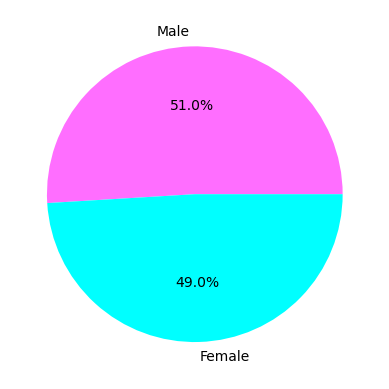

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', colors=neon_colors)
plt.show

## Quartiles, Outliers and Boxplots

In [35]:
last_timepoint = Clean_mouse.groupby("Mouse ID")["Timepoint"].max().reset_index()

merged_df = pd.merge(last_timepoint, Clean_mouse, on=["Mouse ID", "Timepoint"], how="left")

treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = merged_df[merged_df["Drug Regimen"].isin(treatment_regimens)]

print(final_tumor_volume[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]])

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
238     y769     Ceftamin           68.594745
239     y793    Capomulin           31.896238
240     y865     Ceftamin           64.729837
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [48]:
# Step 1: Put treatments into a list for the loop and plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Step 2: Create an empty list to fill with tumor volume data for plotting
tumor_vol_data = []

# Step 3: Calculate the IQR and determine potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = Clean_mouse.loc[Clean_mouse["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add the subset of tumor volume data to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR for the tumor volume data
    q1 = st.scoreatpercentile(treatment_data, 25)
    q3 = st.scoreatpercentile(treatment_data, 75)
    iqr = q3 - q1
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Locate any potential outliers that fall outside the lower and upper bounds
    potential_outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
  
    print(f"Treatment: {treatment}")
    print(f"Potential Outliers: {potential_outliers}")
    print("---------------------------------")

Treatment: Capomulin
Potential Outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
---------------------------------
Treatment: Ramicane
Potential Outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
---------------------------------
Treatment: Infubinol
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------
Treatment: Ceftamin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------


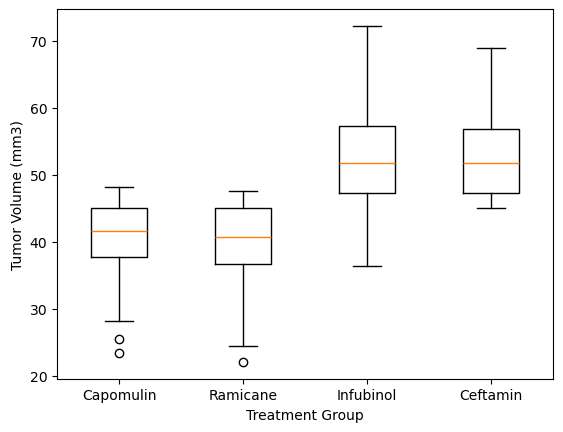

In [47]:

tumor_vol_data = [Clean_mouse.loc[Clean_mouse["Drug Regimen"] == treatment, "Tumor Volume (mm3)"] for treatment in treatments]

fig, ax = plt.subplots()


ax.boxplot(tumor_vol_data, labels=treatments)


ax.set_xlabel("Treatment Group")
ax.set_ylabel("Tumor Volume (mm3)")


plt.show()

## Line and Scatter Plots

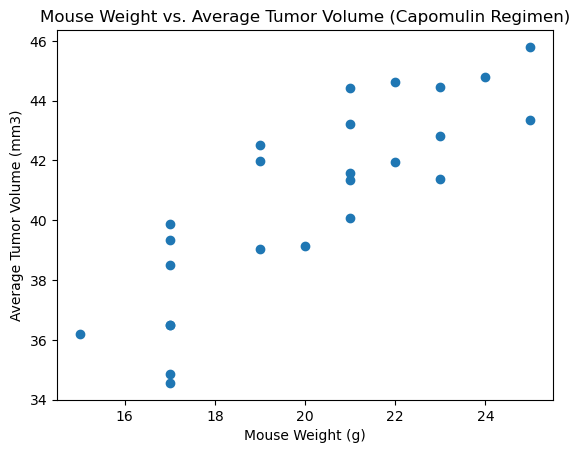

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = Clean_mouse[Clean_mouse["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, average_tumor_volume)


plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.841936342469472
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared Value: 0.7088568047708723


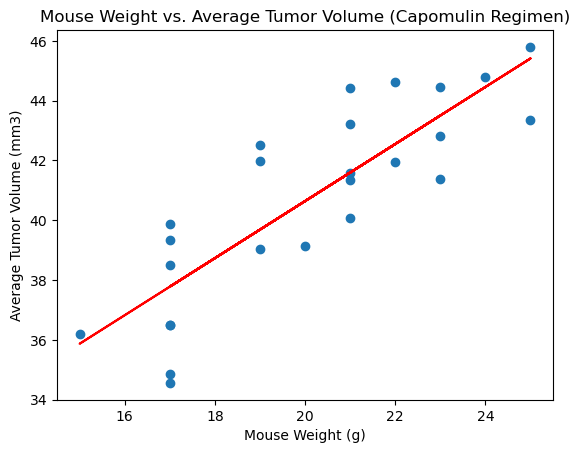

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# Step 1: Filter the dataframe for the Capomulin regimen
capomulin_data = Clean_mouse[Clean_mouse["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()


correlation_coefficient, _ = st.pearsonr(mouse_weight, average_tumor_volume)
print("Correlation Coefficient:", correlation_coefficient)

#linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared Value:", r_value**2)


plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color="red")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()